In [5]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [9]:
train=pd.read_csv('train.csv',parse_dates=["datetime"])
train.shape

(10886, 12)

In [10]:
test=pd.read_csv('test.csv',parse_dates=["datetime"])
test.shape

(6493, 9)

In [11]:
train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["hour"]=train["datetime"].dt.hour
train["minute"]=train["datetime"].dt.minute
train["second"]=train["datetime"].dt.second
train["dayofweek"]=train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [12]:
test["year"]=test["datetime"].dt.year
test["month"]=test["datetime"].dt.month
test["day"]=test["datetime"].dt.day
test["hour"]=test["datetime"].dt.hour
test["minute"]=test["datetime"].dt.minute
test["second"]=test["datetime"].dt.second
test["dayofweek"]=test["datetime"].dt.dayofweek
test.shape

(6493, 16)

In [13]:
#풍속이 0인것과 아닌 것으로 나누어서 예측해보기 
trainWind0=train.loc[train["windspeed"]==0]
trainWindNot0=train.loc[train["windspeed"]!=0]
print(trainWind0.shape)
print(trainWindNot0.shape)


(1313, 19)
(9573, 19)


In [16]:
from sklearn.ensemble import RandomForestClassifier
def predict_windspeed(data):
    #풍속이 0인 것과 아닌 것 나눠주기 
    dataWind0=data.loc[data["windspeed"]==0]
    dataWindNot0=data.loc[data["windspeed"]!=0]
    
    #풍속을 예측할 피처를 선택한다. 
    wCol=["season","weather","humidity","month","temp","year","atemp"]
    
    #풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다. 
    dataWindNot0["windspeed"]=dataWindNot0["windspeed"].astype("str")
    
    #랜덤 포레스트 분류기
    rfModel_wind=RandomForestClassifier()
    
    #wcol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다. 
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0["windspeed"])
    
    #학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다. 
    wind0Values= rfModel_wind.predict(X=dataWind0[wCol])
    
    #값을 다 예측 후 비교해보기 위해 
    #예측한 값을 넣어 줄 데이터 프레임을 새로 만든다. 
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    #값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다
    predictWind0["windspeed"]=wind0Values
    
    #dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터 프레임을 합쳐준다. 
    data=predictWindNot0.append(predictWind0)
    
    #풍속의 데이터 타입을 float로 지정해준다. 
    data["windspeed"]=data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)
    
    return data

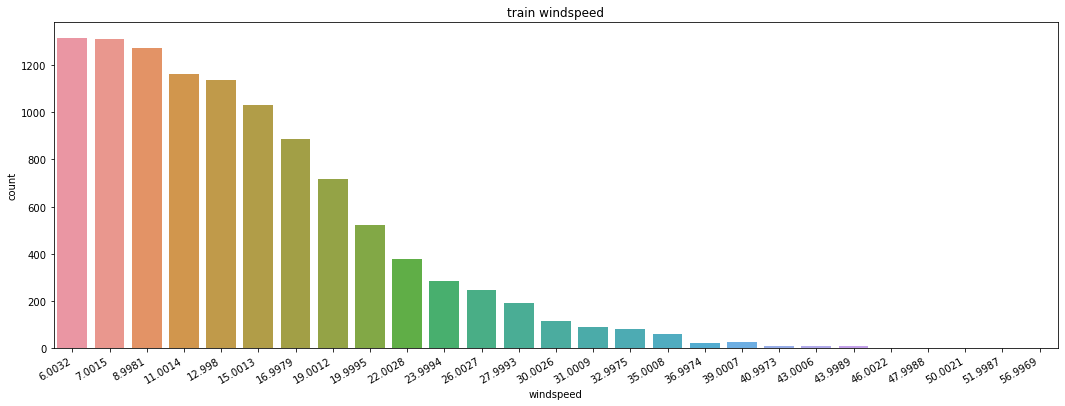

In [17]:
#0값을 조정한다. 
train=predict_windspeed(train)

#widspeed 의 0값을 조정한 데이터를 시각화
fig,ax1=plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30,ha="right")
ax1.set(ylabel="Count",title="train windspeed")
sns.countplot(data=train,x="windspeed",ax=ax1)

In [19]:
#Feature Selection : 신호와 잡음을 구분해야한다. 피처가 많다고 해서 무조건 성능이 좋은 껏은 아니다. 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않으면 제거한다. 
#연속형 feature =["temp","humidity","windspeed","atemp"]
#범주형 feature의 type을 category로 변경해준다. 
categorical_feature_names=["season","holiday","workingday","weather","dayofweek","month","year","hour"]
for var in categorical_feature_names:
    train[var]=train[var].astype("category")
    test[var]=test[var].astype("category")

feature_names=["season","weather","temp","atemp","humidity","windspeed","holiday","workingday","dayofweek","month","year","hour"]
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'holiday',
 'workingday',
 'dayofweek',
 'month',
 'year',
 'hour']

In [20]:
x_train=train[feature_names]
print(x_train.shape)
x_train.head()

(10886, 12)


,season,weather,temp,atemp,humidity,windspeed,holiday,workingday,dayofweek,month,year,hour
0,1,2,9.84,12.880,75,6.0032,0,0,5,1,2011,5
1,1,1,15.58,19.695,76,16.9979,0,0,5,1,2011,10
2,1,1,14.76,16.665,81,19.0012,0,0,5,1,2011,11
3,1,1,17.22,21.210,77,19.0012,0,0,5,1,2011,12
4,1,2,18.86,22.725,72,19.9995,0,0,5,1,2011,13


In [21]:
x_test=train[feature_names]
print(x_test.shape)
x_test.head()

(10886, 12)


,season,weather,temp,atemp,humidity,windspeed,holiday,workingday,dayofweek,month,year,hour
0,1,2,9.84,12.880,75,6.0032,0,0,5,1,2011,5
1,1,1,15.58,19.695,76,16.9979,0,0,5,1,2011,10
2,1,1,14.76,16.665,81,19.0012,0,0,5,1,2011,11
3,1,1,17.22,21.210,77,19.0012,0,0,5,1,2011,12
4,1,2,18.86,22.725,72,19.9995,0,0,5,1,2011,13


In [22]:
label_name="count"
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [25]:
#RMSLE : 오차가 클수록 0에서 멀어진다. 
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    #넘파이로 배열 형태를 바꿔준다. 
    predicted_values=np.array(predicted_values)
    actual_values=np.array(actual_values)
    
    #예측갑솨 실제 값에 1을 더하고 로그를 씌워준다. 
    log_predict=np.log(predicted_values+1)
    log_actual=np.log(actual_values+1)
    
    #위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다. 
    difference=log_predict-log_actual
    difference=np.square(difference)
    
    #평균을 낸다
    mean_difference=difference.mean()
    
    #다시 루트를 씌운다
    score=np.sqrt(mean_difference)
    
    return score

rmsle_scorer=make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [26]:
#cross validation 교차 검증 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold=KFold(n_splits=19,shuffle=True,random_state=0)

In [27]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list=[]
model=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)

In [29]:
%time score = cross_val_score(model,x_train,y_train,cv=k_fold,scoring=rmsle_scorer)
score=score.mean()
print("Score={0:.5f}".format(score))

CPU times: user 10.9 s, sys: 7.7 s, total: 18.6 s
Wall time: 47.5 s
Score=0.31964


In [31]:
#학습시킴, 피팅 
model.fit(x_train,y_train)
#예측
predictions=model.predict(x_test)
print(predictions.shape)
predictions[0:10]

(10886,)


array([  1.5 ,  45.56,  63.29,  84.61, 113.36, 117.57, 103.35,  91.17,
        87.71,  52.94])

[Text(0.5, 1.0, 'test')]

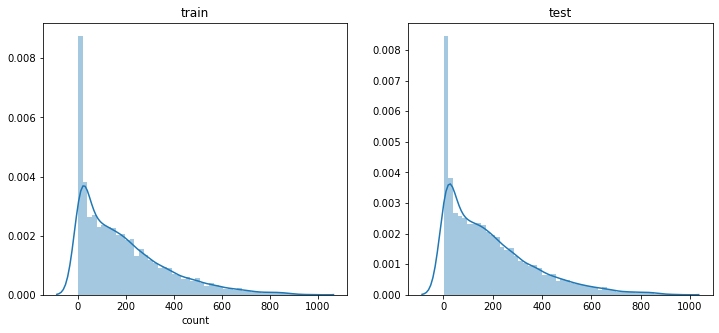

In [32]:
#데이터 시각화
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [38]:
submission= pd.read_csv('sampleSubmission.csv')
submission


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [41]:
submission.to_csv("Score_{0:.5f}_submission.csv".format(score),index=False)